# Aprendizaje Automatico I - Gravi Fiorino - Gauto

Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

3. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada
una de las variables involucradas en el problema detallando características,
comportamiento y rango de variación.
Debe incluir:
    * Análisis y decisión sobre datos faltantes.
    * Visualización de datos (por ejemplo histogramas, scatterplots entre variables,
    diagramas de caja)
    * ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
    * Codificación de variables categóricas (si se van a utilizar para predicción).
    * Matriz de correlación de variables.
    * Estandarización de datos.

    * Validación cruzada train - test. Realizar una división del conjunto de datos en
    conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir
    validación, que luego será útil)
    * en el MOMENTO donde usted lo crea adecuado.

Leemos archivo

In [2]:
archivo = pd.read_csv("weatherAUS.csv")
archivo.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [3]:
archivo.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

# Análisis Exploratorio

In [4]:
archivo.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0


Dropeamos columna "Unnamed: 0"

In [5]:
archivo = archivo.drop("Unnamed: 0", axis = "columns")

### Eliminacion de ciudades

Nos quedamos con las ciudades de interes:  
* Adelaide,  
* Canberra, 
* Cobar, 
* Dartmoor, 
* Melbourne,
* MelbourneAirport, 
* MountGambier, 
* Sydney, 
* SydneyAirport.

In [6]:
ciudadesDeInteres = ["Adelaide","Canberra","Cobar", "Dartmoor","Melbourne","MelbourneAirport", "MountGambier", "Sydney", "SydneyAirpor"]

In [7]:
df = archivo[archivo['Location'].isin(ciudadesDeInteres)]
#df.head()

In [8]:
df["Location"].unique()

array(['Cobar', 'Sydney', 'Canberra', 'MelbourneAirport', 'Melbourne',
       'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

Nos parecio imperativo conocer la estación del año en la que nos encontramos. Por lo tanto, construimos una funcion para ello

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

def get_season(month):
    if month in [12, 1, 2]:  # Diciembre, Enero, Febrero -> Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Marzo, Abril, Mayo -> Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Junio, Julio, Agosto -> Invierno
        return 'Invierno'
    else:  # Septiembre, Octubre, Noviembre -> Primavera
        return 'Primavera'
df['Season'] = df['Date'].dt.month.map(get_season)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24340\426852557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Lucas\AppData\Local\Temp\ipykernel_24340\426852557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].dt.month.map(get_season)


-- Ordenamos el dataframe por fecha para despues realizar el split como fue indicado en las correciones

In [10]:
df = df.sort_values(by = 'Date')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Season
45573,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes,3.6,Primavera
45574,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes,3.6,Primavera
45575,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes,39.8,Primavera
45576,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes,2.8,Primavera
45577,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No,0.0,Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99480,2017-06-24,Adelaide,5.0,17.3,0.0,NaN,NaN,W,17.0,NaN,...,1020.7,1018.5,NaN,NaN,9.6,16.7,No,No,0.0,Invierno
67178,2017-06-24,MelbourneAirport,5.7,12.6,1.2,1.8,5.6,SW,33.0,W,...,1018.9,1017.5,2.0,7.0,8.0,11.2,Yes,No,0.0,Invierno
70370,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,SW,30.0,WNW,...,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,No,0.0,Invierno
83979,2017-06-24,Dartmoor,6.2,11.8,3.0,NaN,NaN,W,20.0,NW,...,1019.8,1017.8,NaN,NaN,6.9,10.9,Yes,No,0.2,Invierno


# Matriz

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

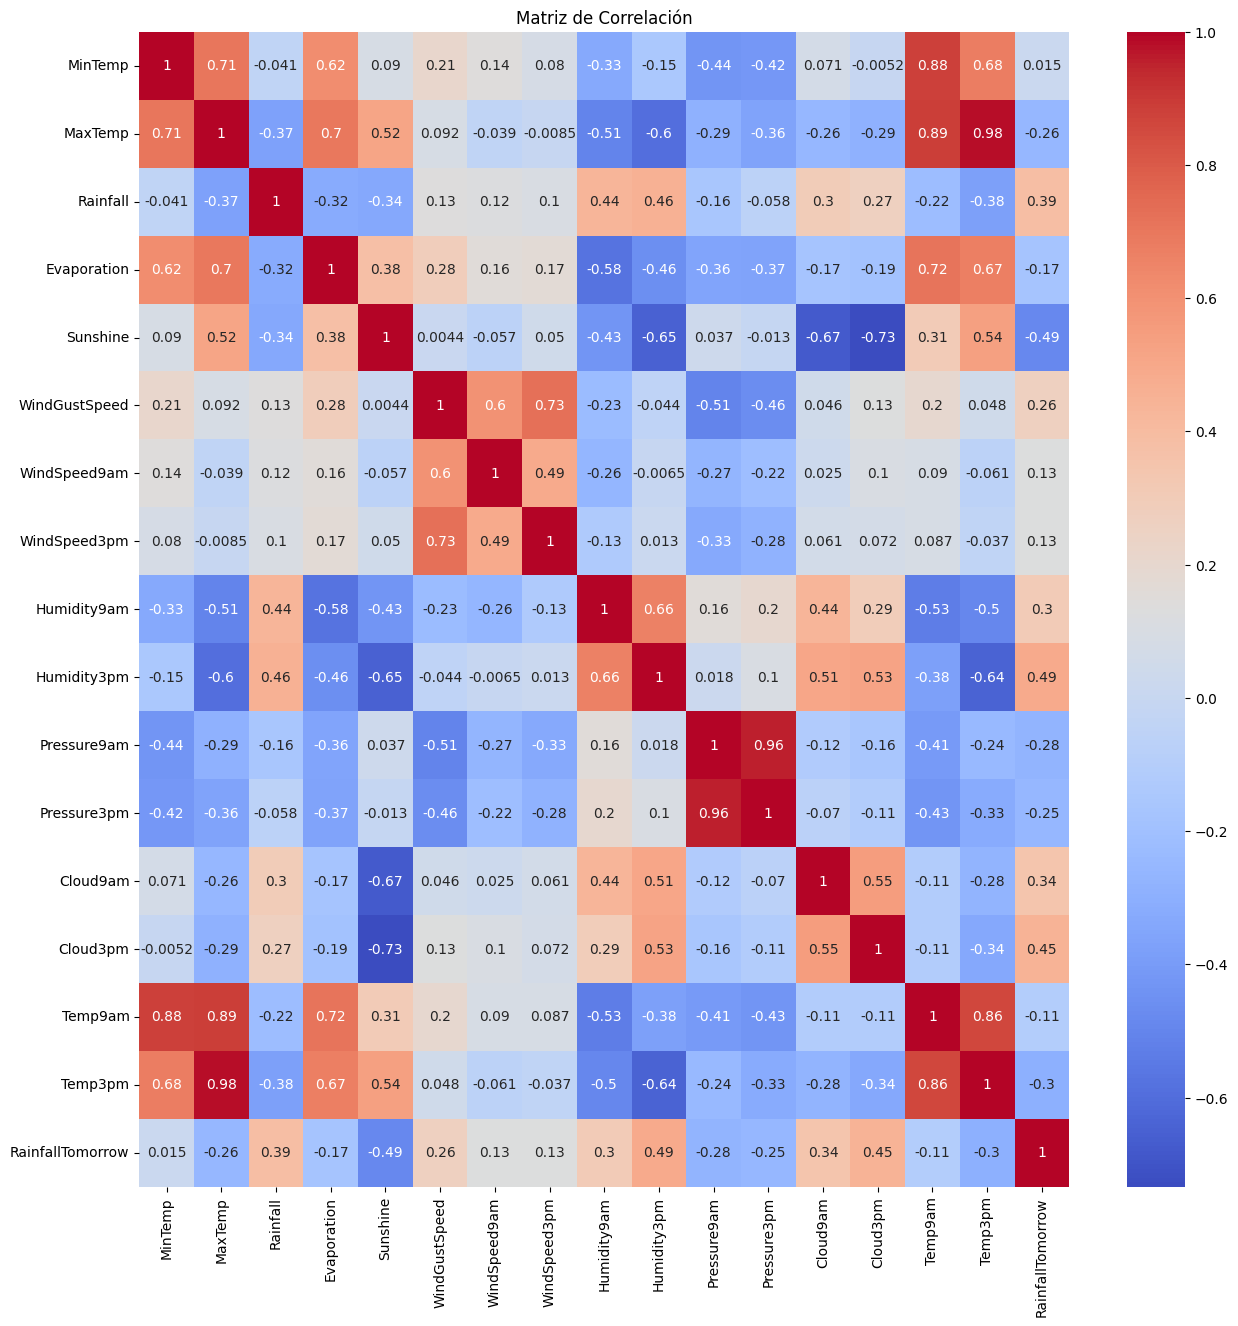

In [12]:
corr_matrix = df.drop(['Date','Location','WindGustDir', 'WindDir9am','WindDir3pm','Season','RainToday','RainTomorrow'], axis=1).corr(method='spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Son varias las correlaciones que podemos encontrar en este dataset, por ello decidimos comentar solamente aquellas que tuvieran una correlación mayor a 0.7 o menor a -0.7 y un caso más para las que variables que posean una correlación inversa (ya que son pocas). Entre ellas se encuentran:

* Temp3pm vs Temp9am
* MaxTemp vs Temp3pm
* MinTemp vs Temp9am
* MaxTemp vs Temp9am
* Cloud3pm vs Sunshine
* Humidity3pm vs Temp3pm
* Pressure3pm vs Pressure9am
* WindSpeed3pm vs WindGustSpeed
* MaxTemp vs MinTemp

# Escalado del conjuto de datos para EDA y Gráficos

Este escalado se realizará sólo con el fin de mejorar el análisis exploratorio.

Posteriormente, cunado se requiera, se realizará el escalado correspondiente para los conjuntos de entrenamiento, validación y testeo.

In [13]:
from sklearn.preprocessing import RobustScaler

df_numerico = df.drop(['Date','Location','WindGustDir', 'WindDir9am','WindDir3pm','Season','RainToday','RainTomorrow'], axis=1)

In [14]:
scaler = RobustScaler()
numerico_escalado = scaler.fit_transform(df_numerico)
df_numerico_escalado = pd.DataFrame(numerico_escalado)
df_numerico_escalado.columns = df_numerico.columns
df_numerico_escalado.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
0,-0.328947,0.363636,0.00,-0.142857,-0.158730,-0.529412,-0.538462,0.090909,-0.111111,-0.777778,0.13,-0.131313,0.2,0.2,-0.013158,0.463158,4.50
1,0.460526,0.626263,4.50,0.095238,0.380952,0.000000,-0.692308,-0.181818,0.333333,-0.518519,-0.60,-0.797980,-0.2,-0.6,0.394737,0.684211,4.50
2,0.421053,0.272727,4.50,0.428571,-0.634921,2.705882,-0.538462,-1.181818,0.407407,0.703704,-0.89,-0.919192,0.4,0.2,0.118421,0.105263,49.75
3,0.368421,-0.525253,49.75,0.761905,0.285714,0.882353,1.307692,0.454545,-0.333333,0.222222,-1.29,-0.939394,-0.8,0.2,-0.131579,-0.536842,3.50
4,-0.381579,-0.464646,3.50,0.380952,0.523810,0.647059,0.538462,0.818182,-0.111111,-0.037037,-0.01,0.222222,0.2,0.2,-0.447368,-0.400000,0.00
5,-0.565789,-0.383838,0.00,0.428571,0.142857,0.294118,0.538462,0.454545,-0.037037,0.259259,0.54,0.545455,0.2,-0.2,-0.473684,-0.463158,0.25
6,-0.578947,-0.252525,0.25,0.047619,0.174603,0.235294,0.461538,0.636364,-0.296296,-0.111111,0.62,0.595960,-0.4,0.0,-0.276316,-0.200000,0.00
7,-0.289474,-0.373737,0.00,0.380952,-0.428571,0.117647,-0.153846,0.454545,-0.222222,0.259259,0.78,0.797980,0.0,0.2,-0.315789,-0.389474,0.00
8,-0.223684,-0.121212,0.00,0.000000,-0.507937,0.529412,0.461538,-0.181818,-0.037037,-0.074074,0.77,0.646465,0.2,0.2,-0.052632,-0.031579,20.25
9,-0.276316,0.212121,20.25,0.333333,0.063492,-0.470588,-0.461538,-1.181818,0.407407,-0.666667,0.57,0.444444,0.2,-1.0,-0.157895,0.263158,0.00


# Graficos

In [15]:
df_numerico_escalado.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')

## ¿Cuánto llueve en proporción a cada estación en base a la ciudad?

In [16]:
# Primero agrupamos el df por ciudad, lluvia y estacion
lluvia_ciudad=df[["Location","RainfallTomorrow","Season"]] 
lluvia_ciudad = lluvia_ciudad.groupby(['Location', 'Season'])['RainfallTomorrow'].sum().reset_index()
lluvia_ciudad

,Location,Season,RainfallTomorrow
0,Adelaide,Invierno,1938.6
1,Adelaide,Otoño,1257.4
2,Adelaide,Primavera,904.4
3,Adelaide,Verano,736.2
4,Canberra,Invierno,1232.1
5,Canberra,Otoño,1113.1
6,Canberra,Primavera,1684.0
7,Canberra,Verano,1924.0
8,Cobar,Invierno,796.4
9,Cobar,Otoño,834.4


In [17]:
# Realizamos una agrupacion por locacion y lluvia mañana
suma_ciudad = lluvia_ciudad.groupby('Location')['RainfallTomorrow'].sum().reset_index()

# Mergeamos en Ciudad
lluvia_ciudad = lluvia_ciudad.merge(suma_ciudad, on='Location', suffixes=('', '_total'))  

# Calculamos la proporcion
lluvia_ciudad['Proportion'] = lluvia_ciudad['RainfallTomorrow'] / lluvia_ciudad['RainfallTomorrow_total']
lluvia_ciudad = lluvia_ciudad.drop('RainfallTomorrow_total', axis=1)

lluvia_ciudad

,Location,Season,RainfallTomorrow,Proportion
0,Adelaide,Invierno,1938.6,0.400819
1,Adelaide,Otoño,1257.4,0.259976
2,Adelaide,Primavera,904.4,0.186991
3,Adelaide,Verano,736.2,0.152214
4,Canberra,Invierno,1232.1,0.206964
5,Canberra,Otoño,1113.1,0.186975
6,Canberra,Primavera,1684.0,0.282873
7,Canberra,Verano,1924.0,0.323188
8,Cobar,Invierno,796.4,0.236433
9,Cobar,Otoño,834.4,0.247714


-- Ahora si pasamos al Gráfico

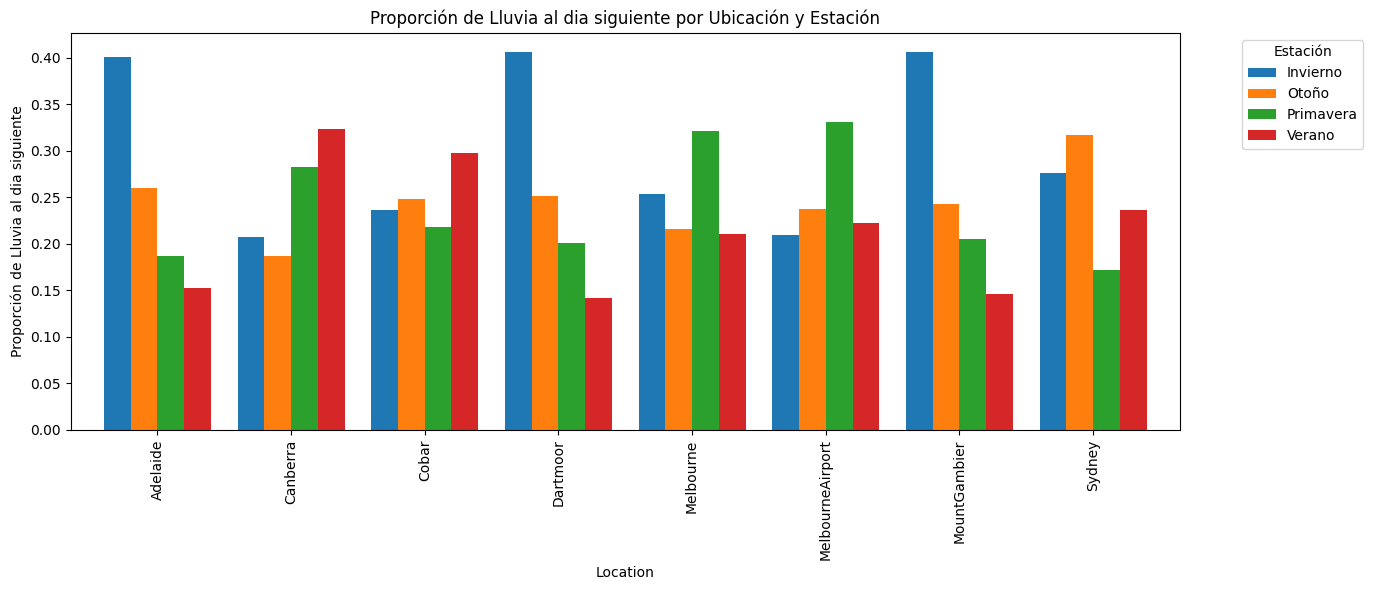

In [18]:
pivoteado = lluvia_ciudad.pivot(index='Location', columns='Season', values='Proportion')
ax = pivoteado.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Location')
plt.ylabel('Proporción de Lluvia al dia siguiente')
plt.title('Proporción de Lluvia al dia siguiente por Ubicación y Estación')
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-- Podemos ver que hay vamos a tener que considerar la estacion y la localidad en un modelo predictivo, ya que en cada region es diferente. 

## Distribución normal 

-- Entender la tendencia central, dispersión y forma de cada variable

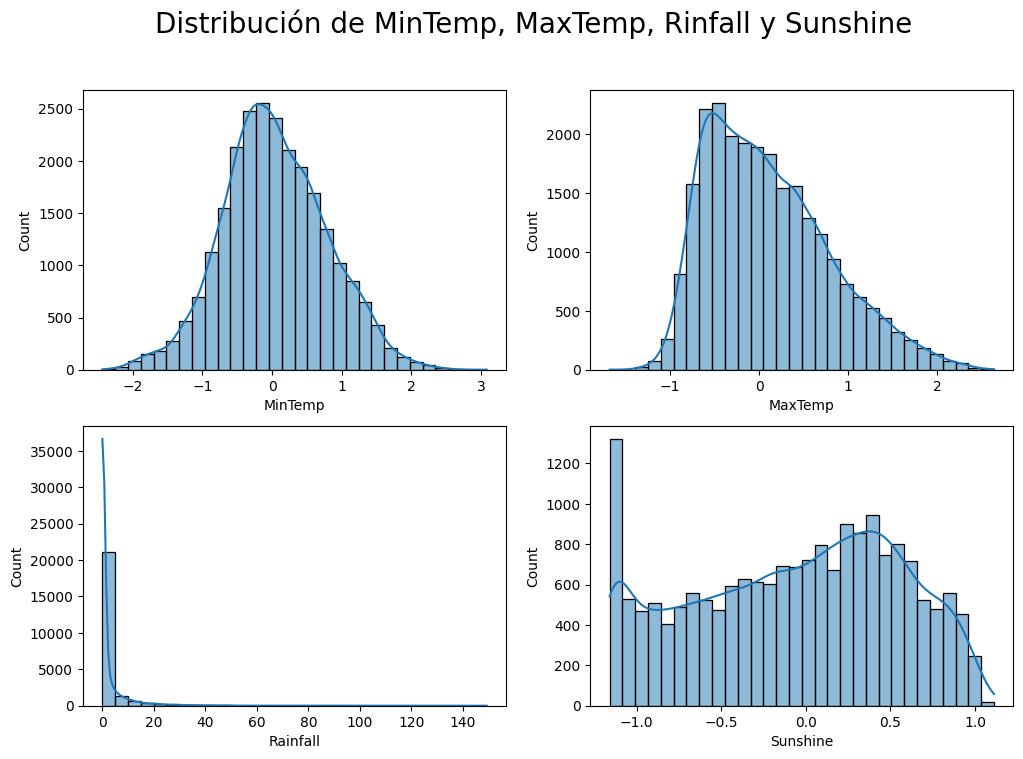

In [19]:
#fig, ax = plt.subplots(2,2,figsize = (12,6), sharex=True, sharey=True)
fig, ax = plt.subplots(2,2,figsize = (12,8))

#plt.figure(figsize=(12, 8))
sns.histplot(data=df_numerico_escalado['MinTemp'], bins=30, kde=True, ax = ax[0,0])
#ax[0,0].set_title('MinTemp')

sns.histplot(data=df_numerico_escalado['MaxTemp'], bins=30, kde=True, ax = ax[0,1])
#ax[0,1].set_title('MaxTemp')

sns.histplot(data=df_numerico_escalado['Rainfall'], bins=30, kde=True, ax = ax[1,0])
#ax[1,0].set_title('Rainfall')

sns.histplot(data=df_numerico_escalado['Sunshine'], bins=30, kde=True, ax = ax[1,1])
#ax[1,1].set_title('Sunshine')

plt.suptitle("Distribución de MinTemp, MaxTemp, Rinfall y Sunshine", fontsize = 20)

#plt.xlabel('Valor')
#plt.ylabel('Frecuencia')
plt.show()

## Valores atípicos

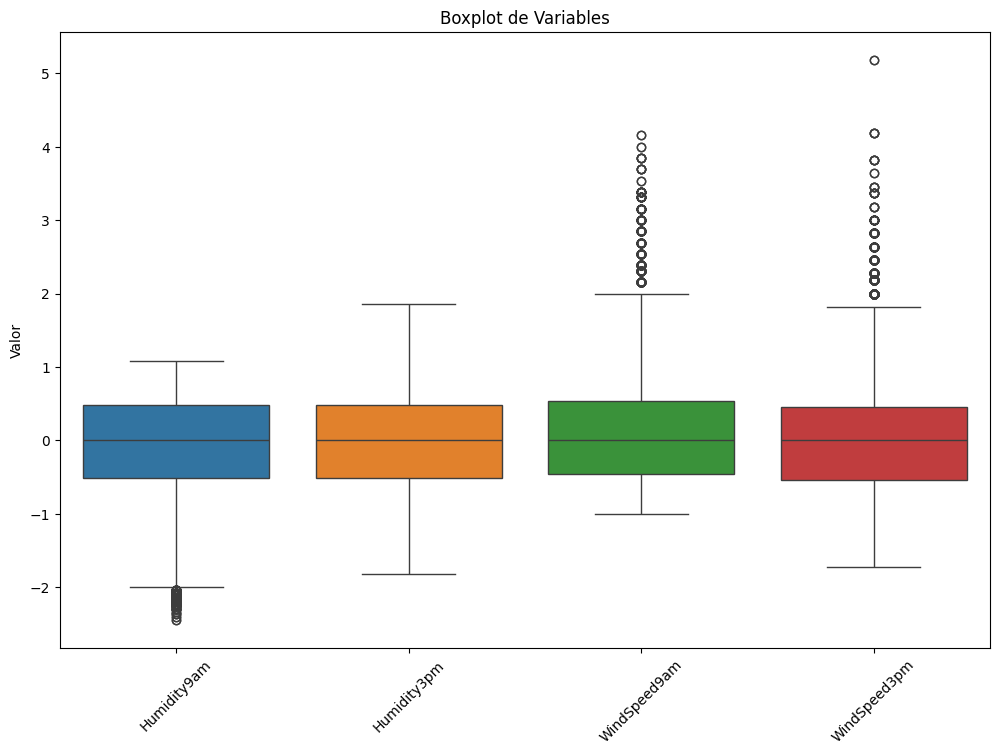

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numerico_escalado[['Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']])
plt.title('Boxplot de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

-- Podemos comprobar que hay variables con outliers

*Comprobemos en otras variables*

Text(0.5, 1.0, 'Distribución de variables numéricas')

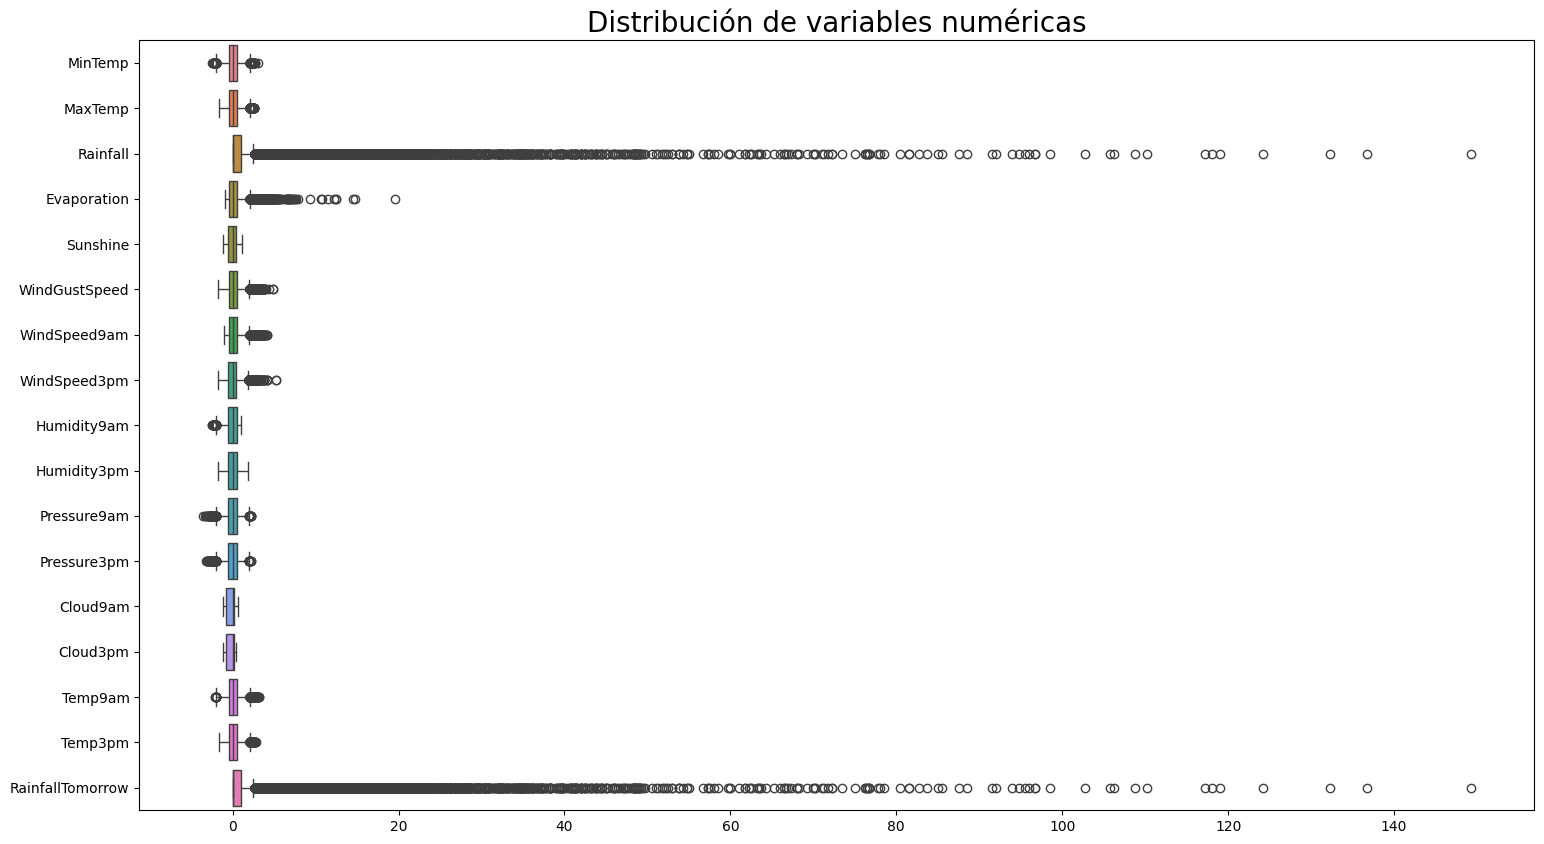

In [21]:

plt.figure(figsize=(18, 10))
sns.boxplot(data=df_numerico_escalado, orient='h')
plt.title("Distribución de variables numéricas", fontsize = 20)

## Correlación de variables con variable a predecir


La correlación de nuestras diversas variables numéricas con la variable numérica a predecir es la siguiente:

In [22]:
corr_matrix['RainfallTomorrow'].sort_values(ascending=False)


RainfallTomorrow    1.000000
Humidity3pm         0.489942
Cloud3pm            0.449607
Rainfall            0.385596
Cloud9am            0.343558
Humidity9am         0.302474
WindGustSpeed       0.261914
WindSpeed9am        0.132988
WindSpeed3pm        0.128658
MinTemp             0.015029
Temp9am            -0.108566
Evaporation        -0.174936
Pressure3pm        -0.254146
MaxTemp            -0.258425
Pressure9am        -0.279509
Temp3pm            -0.299044
Sunshine           -0.488825
Name: RainfallTomorrow, dtype: float64

Las dos variables que poseen una mayor correlación con la variable a predecir son la humedad a las 3pm y la luz solar. A continuación vemos estas correlaciones graficadas, logrando ver cómo cuando la humedad a las 3pm es mayor también es más probable que al día siguiente llueva. Del mismo modo, cuando hay más luz solar es más probable que al día siguiente llueva.

Esto tiene sentido ya que es un hecho de que cuando hay días muy soleados y con mucha humedad, al día siguiente suele llover.

## ¿RainTomorrow?

Text(0.5, 1.0, 'Relación entre la luz solar y\n la lluvia al día siguiente')

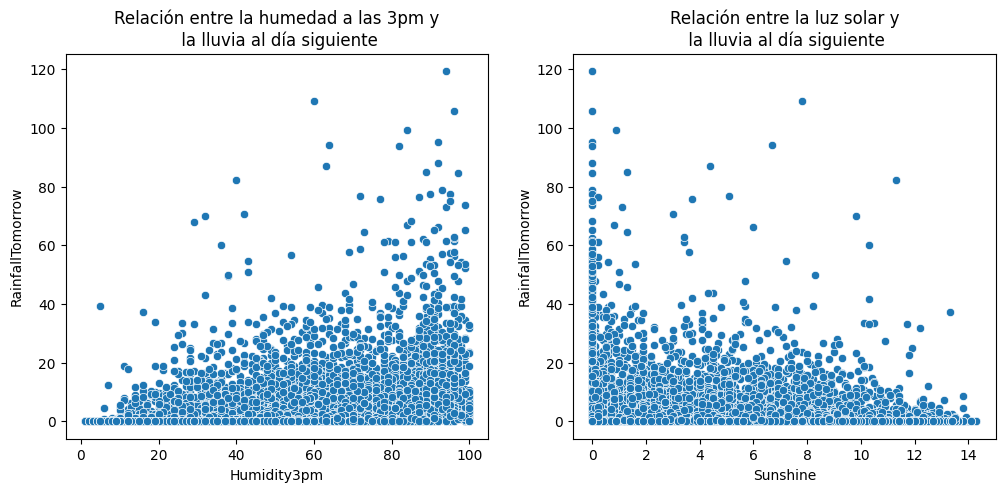

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data = df, x='Humidity3pm', y='RainfallTomorrow', ax=ax[0])
ax[0].set_title("Relación entre la humedad a las 3pm y\n la lluvia al día siguiente")
sns.scatterplot(data = df, x='Sunshine', y='RainfallTomorrow', ax=ax[1])
ax[1].set_title("Relación entre la luz solar y\n la lluvia al día siguiente")

Las otras dos variables que les siguen en cuanto a relación con la lluvia al día siguiente son: Las nubes las 3pm y la temperatura a las 3pm.

Estas relaciones tienen sentido ya que mientras más nublado esté es más probable que llueva al día siguiente. En el caso de la temperatura tenemos que hay una relación no tan lineal pero que al final nos termina indicando que mientras mayor es la temperatura a las 3pm es menos probable que llueva: la tempreatura no debe ser ni muy baja ni muy alta para que las probabilidades de lluvia al día siguiente aumenten.

Text(0.5, 1.0, 'Relación entre la temperatura a las 3pm y\n la lluvia al día siguiente')

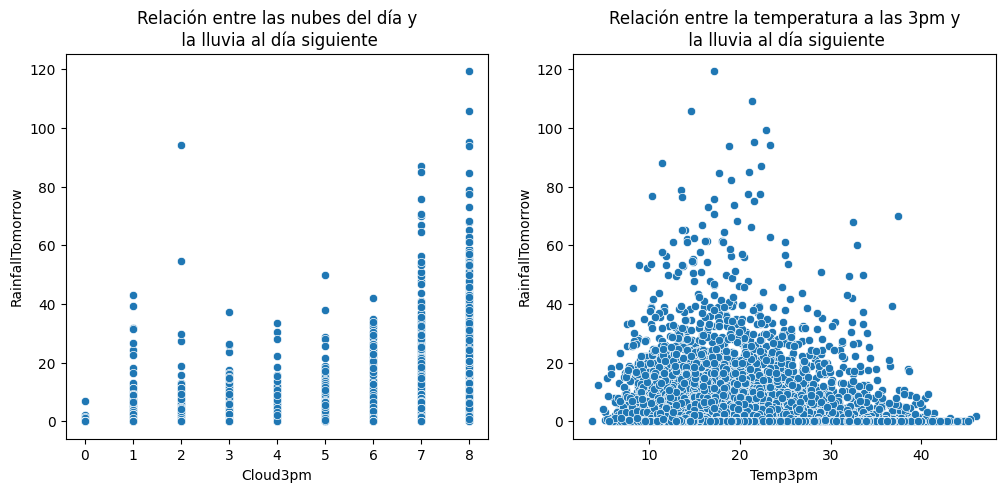

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data = df, x='Cloud3pm', y='RainfallTomorrow', ax=ax[0])
ax[0].set_title("Relación entre las nubes del día y\n la lluvia al día siguiente")
sns.scatterplot(data = df, x='Temp3pm', y='RainfallTomorrow', ax=ax[1])
ax[1].set_title("Relación entre la temperatura a las 3pm y\n la lluvia al día siguiente")

Para finalizar con este análisis de correlaciones seguimos con las ultimas dos variables más relacionadas con la variable dependiente: la lluvia del día y la presión a las 9 de la mañana.

En este caso vemos cómo a medida que la lluvia actual aumenta, también lo hace la lluvia de mañana. Por el contrario en el caso de la presión a las 9am vemos que es más probable que llueva mañana cuando la presión del día se encuentra con valores ni muy bajos ni muy altos.

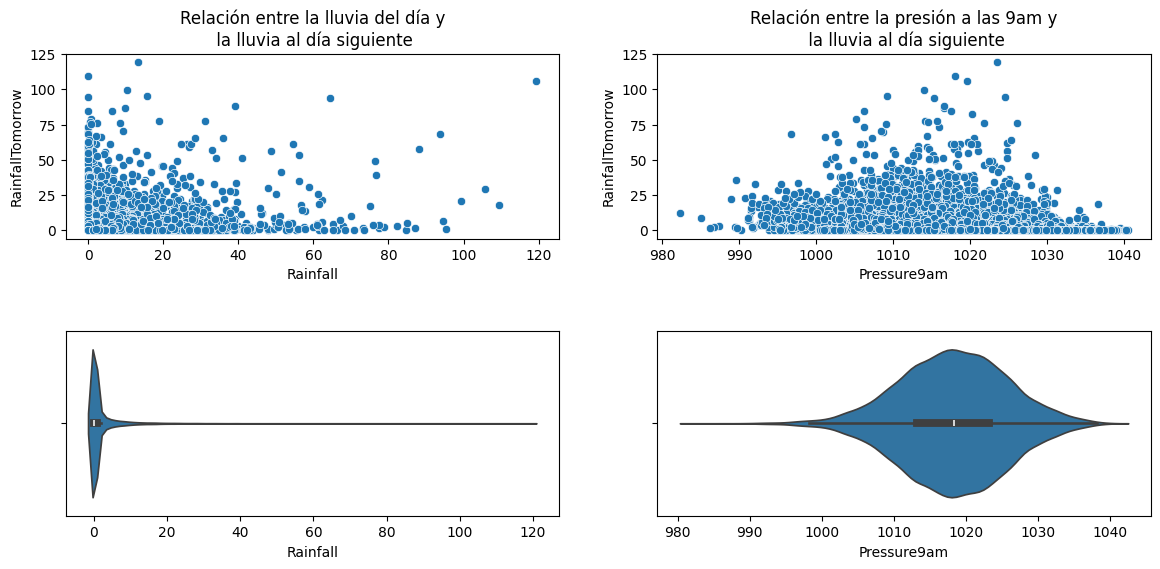

In [25]:
fig, ax = plt.subplots(2,2, figsize=(14,6))

sns.scatterplot(data = df, x='Rainfall', y='RainfallTomorrow', ax=ax[0,0])
ax[0,0].set_title("Relación entre la lluvia del día y\n la lluvia al día siguiente")
sns.violinplot(data = df['Rainfall'], ax=ax[1,0], orient='h')

sns.scatterplot(data = df, x='Pressure9am', y='RainfallTomorrow', ax=ax[0,1])
ax[0,1].set_title("Relación entre la presión a las 9am y\n la lluvia al día siguiente")
sns.violinplot(data = df['Pressure9am'], ax=ax[1,1], orient='h')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Split

-- Por lo tanto pasamos ahora a hacer el split + Correción de la primer entrega según indicaciones.

In [26]:
# Codificación de variables categóricas
columns = ['Location', 'WindGustDir', 'RainToday', 'WindDir9am','WindDir3pm']
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
df_encoded.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainfallTomorrow', 'Season',
       'Location_Canberra', 'Location_Cobar', 'Location_Dartmoor',
       'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_MountGambier', 'Location_Sydney', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'RainToday_Yes', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_

-- Vamos a dividir en 80% por entrenamiento y 20% para testeo.

In [27]:
# Dividimos
cantFilas = df_encoded.shape[0]
cantEntrenamiento = cantFilas*0.8
cantTest = cantFilas*0.2
cantEntrenamiento, cantTest

(20180.0, 5045.0)

Tenemos así que las primeras 20180 filas las usaremos como entrenamiento, y las últimas 5045 las usaremos como testeo.

In [28]:
entrenamiento = df_encoded.head(int(cantEntrenamiento))
testeo = df_encoded.tail(int(cantTest))

Ahora, queda separar las variables dependientes de las independientes. Para ello separamos de los conjuntos las variables que deseamos predecir.

In [29]:
#Para entrenamiento
X_train = entrenamiento.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1_train = entrenamiento['RainTomorrow']
y2_train = entrenamiento['RainfallTomorrow']

#Para test
X_test = testeo.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1_test = testeo['RainTomorrow']
y2_test = testeo['RainfallTomorrow']

Por último, eliminamos las variables no numéricas que dejamos. La excepción será Season ya que la usaremos posteriormente para inputar los nulos.

In [30]:
X_train.drop('Date', axis = 1, inplace = True)
X_test.drop('Date', axis = 1, inplace = True)

# Nulos

In [31]:
X_train.iloc[:,:20].isnull().sum()

MinTemp               354
MaxTemp               341
Rainfall              739
Evaporation          1977
Sunshine             3942
WindGustSpeed        1518
WindSpeed9am          348
WindSpeed3pm          336
Humidity9am           601
Humidity3pm           556
Pressure9am           615
Pressure3pm           613
Cloud9am             7165
Cloud3pm             7454
Temp9am               369
Temp3pm               363
Season                  0
Location_Canberra       0
Location_Cobar          0
Location_Dartmoor       0
dtype: int64

In [32]:

X_test.iloc[:,:20].isnull().sum()

MinTemp               215
MaxTemp               217
Rainfall              243
Evaporation          2330
Sunshine             2755
WindGustSpeed          73
WindSpeed9am            7
WindSpeed3pm            3
Humidity9am           337
Humidity3pm           330
Pressure9am           216
Pressure3pm           213
Cloud9am             2198
Cloud3pm             2096
Temp9am               215
Temp3pm               212
Season                  0
Location_Canberra       0
Location_Cobar          0
Location_Dartmoor       0
dtype: int64

Nota: ojo con borrar nulos de y sin borrar los mismos registros de x porque van a quedar medio mal los registros

In [33]:
y1_train.shape, X_train.shape, y1_test.shape, X_test.shape

((20180,), (20180, 70), (5045,), (5045, 70))

In [34]:
y1_train.isnull().sum()
y1_test.isnull().sum()

242

In [35]:
#df['WindGustDir'].head(4)
#df['WindGustSpeed'].head(4)
#df['WindDir9am'].head(4)
#df['WindDir3pm'].head(4)
#df['RainToday'].head(4)
#df['RainTomorrow'].head(4)


### Nulos numéricos

Valores nulos de Mediana, son aquellos valores que decidimos completar con esta medida, por ejemplo las temperaturas minimas y maximas, los valores de Rainfall y Evaporation, la presion a las 3 y 9, nubosidad y temperatura a 3 y 9

In [36]:
"""
Esta funcion la creamos para poder setear las medianas por locación y estación.
Principalmente creímos que esto es lo apropiado debido a que aspectos como la temperatura,
lluvia, presión, etc., son sensibles tanto a la región como a la estación en la que se miden.
Nos pareció apropiado distinguir las medianas de según cada región y estación del año.
"""

def nulos_mediana(data, col):
    mediana = data.groupby(['Season'])[col].transform('median')
    data.loc[data[col].isnull(), col] = mediana

In [37]:
# Min temp
nulos_mediana(X_train,'MinTemp')
nulos_mediana(X_test,'MinTemp')

# Max temp
nulos_mediana(X_train,'MaxTemp')
nulos_mediana(X_test,'MaxTemp')

# Rainfall
nulos_mediana(X_train,'Rainfall')
nulos_mediana(X_test,'Rainfall')

# Evaporation
nulos_mediana(X_train, 'Evaporation')
nulos_mediana(X_test, 'Evaporation')

# Pressure9am
nulos_mediana(X_train,'Pressure9am')
nulos_mediana(X_test,'Pressure9am')

# Pressure3pm
nulos_mediana(X_train,'Pressure3pm')
nulos_mediana(X_test,'Pressure3pm')

# Temp9am , 3pm
nulos_mediana(X_train,'Temp9am')
nulos_mediana(X_test,'Temp9am')
              
nulos_mediana(X_train,'Temp3pm')
nulos_mediana(X_test,'Temp3pm')

# WindGustSpeed
nulos_mediana(X_train,'WindGustSpeed')
nulos_mediana(X_test,'WindGustSpeed')

# WindSpeed
nulos_mediana(X_train,'WindSpeed9am')
nulos_mediana(X_test,'WindSpeed9am')

nulos_mediana(X_train,'WindSpeed3pm')
nulos_mediana(X_test,'WindSpeed3pm')

# Sunshine
nulos_mediana(X_train,'Sunshine')
nulos_mediana(X_test,'Sunshine')

# Humidity 9am
nulos_mediana(X_train,'Humidity9am')
nulos_mediana(X_test,'Humidity9am')

nulos_mediana(X_train,'Humidity3pm')
nulos_mediana(X_test,'Humidity3pm')

# Cloud
nulos_mediana(X_train, 'Cloud9am')
nulos_mediana(X_test, 'Cloud9am')

nulos_mediana(X_train,'Cloud3pm')
nulos_mediana(X_test,'Cloud3pm')

En el caso de las variables dependientes pareciera ser que poseen la misma cantidad de nulos... Verifiquemos que se trata de los mismos registros

In [38]:
y1_train.isnull().sum(), y2_train.isnull().sum()

(739, 739)

In [39]:
import numpy as np

In [40]:
#Creamos arrays con los indices de cada df que contienen valore nulos
y1IndicesNulos = y1_train[y1_train.isnull() == True].index
y2IndicesNulos = y2_train[y2_train.isnull() == True].index

In [41]:
#Comprobamos que los indces sean iguales
np.unique(y1IndicesNulos == y2IndicesNulos)

array([ True])

Como podemos ver, se trata en ambos casos de los mismos registros. Podríamos buscar imputar estos valores faltantes, pero dado que estos datos representan apenas un 3,6% de nuestros datos, preferimos eliminar estos valores.

In [42]:
print("Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos: ", y1IndicesNulos.shape[0]/y1_train.shape[0])

Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos:  0.03662041625371655


*Para eliminar estos datos, lo haremos teniendo en cuenta que también debemos eliminar los mismos índices para nuestro X_train.*

In [43]:
#Eliminamos esos indices del conjunto de entrenamiento
X_train = X_train[X_train.index.isin(y1IndicesNulos)==False]
X_train.shape

(19441, 70)

In [44]:
y1_train = y1_train.dropna()
y2_train = y2_train.dropna()
y1_train.shape, y2_train.shape

((19441,), (19441,))

## Conjunto de Testeo

El conjunto de X_test no posee valores nulos.

In [45]:

X_test.iloc[:,:20].isnull().any()

MinTemp              False
MaxTemp              False
Rainfall             False
Evaporation          False
Sunshine             False
WindGustSpeed        False
WindSpeed9am         False
WindSpeed3pm         False
Humidity9am          False
Humidity3pm          False
Pressure9am          False
Pressure3pm          False
Cloud9am             False
Cloud3pm             False
Temp9am              False
Temp3pm              False
Season               False
Location_Canberra    False
Location_Cobar       False
Location_Dartmoor    False
dtype: bool

Sin embargo, en el caso de las variables dependientes si que los hay. Concretamente 242 registros nulos en cada variable. Comprobemos si son los mismos registros.

In [46]:
y1_test.isnull().sum(), y2_test.isnull().sum()

(242, 242)

In [47]:
listaNulosy1Test = y1_test[y1_test.isnull()].index
listaNulosy2Test = y2_test[y2_test.isnull()].index

In [48]:
np.unique(listaNulosy1Test == listaNulosy2Test)

array([ True])

Comprobamos que se trata de los mismos registros. Verifiquemos el la proporción con respecto al total de estos registros:

In [49]:
len(listaNulosy1Test)/y1_test.shape[0]

0.047968285431119924

Como podemos ver, los valores nulos de estas variables representan a penas un 4% del total. Por lo tanto, removeremos estos registros tanto de las y como del conjunto de las X.

In [50]:
X_test = X_test[X_test.index.isin(listaNulosy1Test)==False]
y1_test = y1_test.dropna()
y2_test = y2_test.dropna()
y1_test.shape, y2_test.shape

((4803,), (4803,))

## Eliminamos Season

In [51]:
X_train = pd.get_dummies(X_train, columns=['Season'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Season'], drop_first=True)

Comprobamos que no hay mas nulos.

In [52]:
null_counts = X_test.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Series([], dtype: int64)


In [53]:
null_counts = X_train.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


Series([], dtype: int64)


# Balanceado

-- Esta balanceado? Debería darnos valores similares, si no fuese el caso de nuestra variable objetivo, claramente el df no estaría balanceado y podría predecir mejor uno de los casos en concreto

In [54]:

df["RainTomorrow"].value_counts()

RainTomorrow
No     18547
Yes     5697
Name: count, dtype: int64

-- Vemos que en este caso, va  a predecir mejor cuando no llueve, que cuándo llueve y cuánto llueve

# Estadarizacion de los datos

In [55]:
from sklearn.preprocessing import StandardScaler

¿Por qué estandarizar?
La estandarización es un proceso importante en el preprocesamiento de datos.
 La estandarización generalmente implica transformar las características para que tengan una media cercana a cero y una desviación estándar de uno. 
 Esto ayuda a que las características estén en la misma escala, lo que puede mejorar la convergencia del modelo y la interpretación de los pesos de las características.

In [56]:
#Creamos df para cada par de train y test respectivamente
df_train_regresion = pd.concat([X_train,y1_train], axis = 1)
df_test_regresion = pd.concat([X_test,y1_test], axis = 1)

In [57]:
#Cambiamos los valores de RainTomorrow para que estos sean de 1's y 0's.
df_train_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_test_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [58]:
df_x_train = df_train_regresion.iloc[:,:-1] #Seleccionamos todas las columnas menos la ultima
df_y_train = df_train_regresion.iloc[:,-1] #Seleccionamos solo la ultima columna

df_x_test = df_test_regresion.iloc[:,:-1] #Todas menos la ultima para test
df_y_test = df_test_regresion.iloc[:,-1] #Solo la ultima para test

In [59]:
df_y_test = df_y_test.fillna(method='ffill') #ffill rellena nulos con el valor del registro anterior
df_y_train = df_y_train.fillna(method='ffill')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24340\1361205829.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_y_test = df_y_test.fillna(method='ffill') #ffill rellena nulos con el valor del registro anterior
C:\Users\Lucas\AppData\Local\Temp\ipykernel_24340\1361205829.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_y_train = df_y_train.fillna(method='ffill')


In [60]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(df_x_train) #X train y X test se escalan por separados para no ocntaminar el entrenamiento

In [61]:
x_test_scaled = scaler.fit_transform(df_x_test)

Es crucial aplicar la misma transformación (media y desviación estándar) que se aprendió del conjunto de entrenamiento (x_train) al conjunto de prueba (x_test). Esto asegura que las características en ambos conjuntos estén en la misma escala relativa. Si aplicas una transformación diferente a x_test, introducirías filtraciones de información del conjunto de prueba al conjunto de entrenamiento, lo cual puede llevar a una evaluación sesgada del modelo.

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [63]:
regresion = LinearRegression()

In [64]:
regresion.fit(x_train_scaled, df_y_train)

LinearRegression()

## Métricas adecuadas

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [66]:
from math import sqrt
def errores(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))

In [67]:
y_pred_regresion = regresion.predict(x_test_scaled)

errores(df_y_test, y_pred_regresion)

R2:   0.35
MSE:  0.12
RMSE: 0.34
MAE:  0.26


# Metodo gradiente descendiente

In [68]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

SGDRegressor 

Modelo lineal ajustado minimizando una pérdida empírica regularizada con SGD.

SGD significa <b>Descenso de Gradiente Estocástico:</b> el gradiente de la pérdida se estima en cada muestra y el modelo se actualiza a lo largo del camino con una programación de fuerza decreciente (también conocida como tasa de aprendizaje).

El regularizador es una penalización añadida a la función de pérdida que contrae los parámetros del modelo hacia el vector cero utilizando ya sea la norma euclidiana al cuadrado L2 o la norma absoluta L1 o una combinación de ambas (Red Elástica). Si la actualización del parámetro cruza el valor 0.0 debido al regularizador, la actualización se trunca a 0.0 para permitir el aprendizaje de modelos dispersos y lograr la selección de características en línea.

In [69]:
sgd_regressor = SGDRegressor() # Modelo de regresion con gradiente descendiente

In [70]:
sgd_regressor.fit(x_train_scaled, df_y_train)

SGDRegressor()

Predict 

In [71]:
y_train_pred_sgd = sgd_regressor.predict(x_train_scaled)
y_test_pred_sgd = sgd_regressor.predict(x_test_scaled)


Evaluar el modelo

In [72]:
train_mse_sgd = mean_squared_error(df_y_train, y_train_pred_sgd) #error cuadratico medio entrenamiento
test_mse_sgd = mean_squared_error(df_y_test, y_test_pred_sgd) #error cuadratico medio test

train_r2_sgd = r2_score(df_y_train, y_train_pred_sgd) #r2 entrenamiento
test_r2_sgd = r2_score(df_y_test, y_test_pred_sgd) #r2 train

# Imprimir las métricas obtenidas
print("Métricas del modelo con Gradiente Descendiente:")
print("MSE (entrenamiento):", train_mse_sgd)
print("MSE (prueba):", test_mse_sgd)
print("R² Score (entrenamiento):", train_r2_sgd)
print("R² Score (prueba):", test_r2_sgd)

Métricas del modelo con Gradiente Descendiente:
MSE (entrenamiento): 0.11756577962906348
MSE (prueba): 0.11986761461377098
R² Score (entrenamiento): 0.3466695471677582
R² Score (prueba): 0.3304725894520517


### ¿Hay algun cambio?
Vemos que el error cuadrático medio (MSE) es ligeramente mayor en la regresión con gradiente estocastico, mientras que el R² es ligeramente menor. Sin embargo, estos valores son prácticamente identicos, por loq ue podemos decir que no hay cambios significativos en ambos métodos.

# Lasso

In [73]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [74]:
lasso_regressor = Lasso(alpha=0.01) # Modelo de regresion con regularizacion lasso

In [75]:
lasso_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Lasso(alpha=0.01)

Predict

In [76]:
y_train_pred_lasso = lasso_regressor.predict(x_train_scaled)
y_test_pred_lasso = lasso_regressor.predict(x_test_scaled)

Evaluamos

In [77]:
train_mse_lasso = mean_squared_error(df_y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(df_y_test, y_test_pred_lasso)

In [78]:
train_r2_lasso = r2_score(df_y_train, y_train_pred_lasso) #r2 entrenamiento
test_r2_lasso = r2_score(df_y_test, y_test_pred_lasso) #r2 train

In [79]:

print("Métricas del modelo Lasso:")
print("MSE (entrenamiento):", train_mse_lasso)
print("R² (entrenamiento): ",train_r2_lasso)
print("MSE (prueba):", test_mse_lasso)
print("R² (entrenamiento): ",test_r2_lasso)



Métricas del modelo Lasso:
MSE (entrenamiento): 0.119492473079014
R² (entrenamiento):  0.33596262625848783
MSE (prueba): 0.11929832078365032
R² (entrenamiento):  0.3336524126691045


# Ridge

In [80]:
ridge_regressor = Ridge(alpha=0.01) # Modelo de regresion con regularizacion Ridge

In [81]:
ridge_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Ridge(alpha=0.01)

Predicts

In [82]:
y_train_pred_ridge = ridge_regressor.predict(x_train_scaled)
y_test_pred_ridge = ridge_regressor.predict(x_test_scaled)

MSE

In [83]:
train_mse_ridge = mean_squared_error(df_y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(df_y_test, y_test_pred_ridge)

In [84]:
train_r2_ridge = r2_score(df_y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(df_y_test, y_test_pred_ridge)

In [85]:
print("\nMétricas del modelo Ridge:")
print("MSE (entrenamiento):", train_mse_ridge)
print("MSE (prueba):", test_mse_ridge)
print("R² (entrenamiento): ", train_r2_ridge)
print("R² (prueba): ", test_r2_ridge)


Métricas del modelo Ridge:
MSE (entrenamiento): 0.11547934731314363
MSE (prueba): 0.11583555663580061
R² (entrenamiento):  0.35826416061790156
R² (prueba):  0.3529938796760047


# ElasticNET

In [86]:
elasticnet_regressor = ElasticNet() # Modelo con Elastic Net

In [87]:
elasticnet_regressor.fit(x_train_scaled, df_y_train) # Entrenamos


ElasticNet()

Predicts

In [88]:
y_train_pred_elasticnet = elasticnet_regressor.predict(x_train_scaled)
y_test_pred_elasticnet = elasticnet_regressor.predict(x_test_scaled)

MSE

In [89]:
train_mse_elasticnet = mean_squared_error(df_y_train, y_train_pred_elasticnet)
test_mse_elasticnet = mean_squared_error(df_y_test, y_test_pred_elasticnet)

In [90]:
train_r2_elasticnet = r2_score(df_y_train, y_train_pred_elasticnet)
test_r2_elasticnet = r2_score(df_y_test, y_test_pred_elasticnet)

In [91]:
print("\nMétricas del modelo ElasticNet:")
print("MSE (entrenamiento):", train_mse_elasticnet)
print("MSE (prueba):", test_mse_elasticnet)
print("R² (entrenamiento): ", train_r2_elasticnet)
print("R² (prueba): ", test_r2_elasticnet)


Métricas del modelo ElasticNet:
MSE (entrenamiento): 0.17994841526122968
MSE (prueba): 0.1790361399719667
R² (entrenamiento):  0.0
R² (prueba):  -1.6589770025277062e-05


# ¿Fue un buen fitting?

Si tenemos en cuenta solo la métrica R² de cada método utilizado, nos quedaría lo siguiente:

In [92]:
train_r2_sgd

0.3466695471677582

In [93]:
metricas = pd.DataFrame()
metricas['Regresion'] = [r2_score(df_y_test, y_pred_regresion)]
metricas['Gradiente'] = [train_r2_sgd]
metricas['Lasso'] = [train_r2_lasso]
metricas['Ridge'] = [train_r2_ridge]
metricas['Elasticnet'] = [train_mse_elasticnet]
metricas

,Regresion,Gradiente,Lasso,Ridge,Elasticnet
0,0.352994,0.34667,0.335963,0.358264,0.179948


In [94]:
metricas_transpuesta = metricas.transpose().rename(columns = {0:'R²'})

<Axes: xlabel='None', ylabel='R²'>

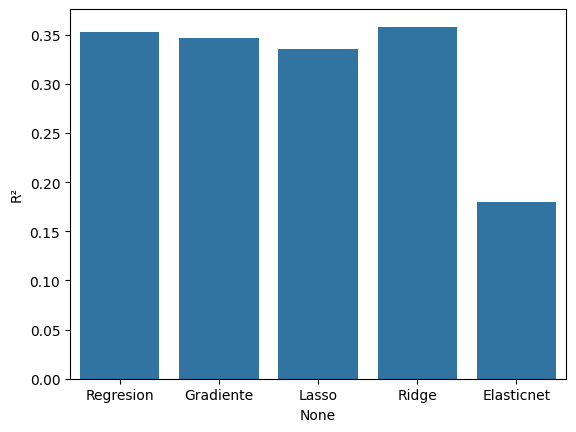

In [95]:
sns.barplot(data = metricas_transpuesta, x=metricas_transpuesta.index, y=metricas_transpuesta['R²'])

Observamos que si bien los resultados tienden a ser similares (excepto Elasticnet), nuestra regresion común es la que explica más a la variable dependiente.

## Análisis de Residuos

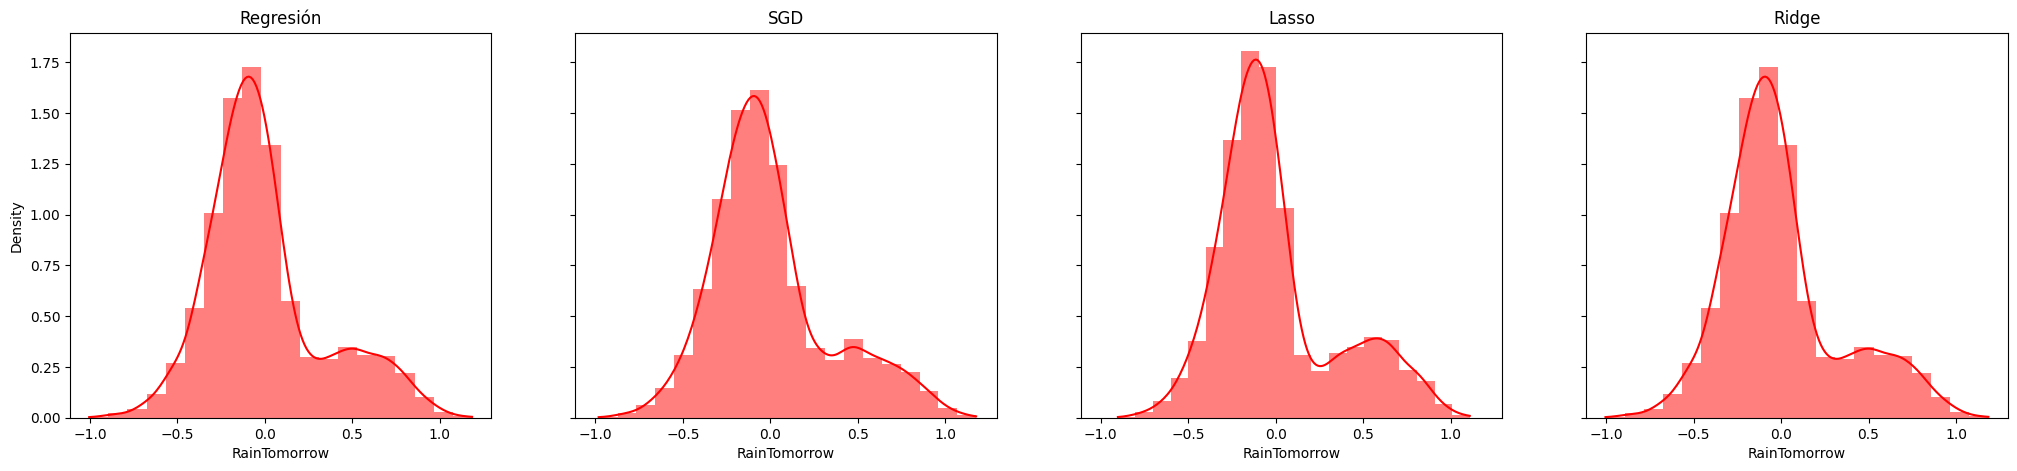

In [96]:
fig, ax = plt.subplots(1,4,figsize=(25,5), sharex=True, sharey=True)
  

sns.histplot((df_y_test - y_pred_regresion), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[0])
ax[0].set_title('Regresión')

sns.histplot((df_y_test - y_test_pred_sgd), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[1])
ax[1].set_title('SGD')

sns.histplot((df_y_test - y_test_pred_lasso), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[2])
ax[2].set_title('Lasso')

sns.histplot((df_y_test - y_test_pred_ridge), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[3])
ax[3].set_title('Ridge')

plt.show()

En este caso todos los residuos son mayores a -2 y menores a 2, por lo que podemos decir que estos cuatro primeros modelos se ajustan adecuadamente a los datos y sus errores de predicción son relativamente pequeños.

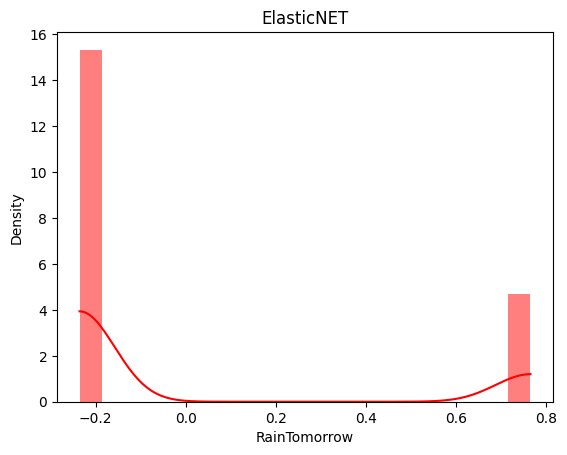

In [97]:
sns.histplot((df_y_test - y_test_pred_elasticnet), color="red", kde=True, stat="density", linewidth=0,bins=20)
plt.title('ElasticNET')
plt.show()

En el caso de ElasticNET no podemos decir lo mismo...

## ¿Por que se obtienen las metricas para ambos conjuntos?
La razón es principalmente el overfitting: puede pasar que nuestro modelo se desempeñe de manera excelente con los datos de entrenamiento pero no se ajuste a los datos reales.

# Regresion Logistica

Implementar la solución del problema de clasificación con regresión logística.
Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, entre otras, ¡investiguen adicionales!). Graficar matrices de confusión para cada modelo. Analizar “falsos negativos” y “falsos positivos”, ¿qué significa cada uno?
Trazar curvas ROC para cada modelo. Comente cuáles serían los umbrales adecuados a utilizar; ¿cómo podría calcular el mejor umbral? ¿Es 0.5 el mejor?
¿Creen que han conseguido un buen fitting? 


In [98]:
y1_train

45573    Yes
45574    Yes
45575    Yes
45576    Yes
45577     No
        ... 
32878     No
83348     No
8423      No
83349     No
98850     No
Name: RainTomorrow, Length: 19441, dtype: object

In [99]:
from sklearn.linear_model import LogisticRegression

regresionLogistica = LogisticRegression()
regresionLogistica.fit(X_train, y1_train)

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
X_train.shape

(19441, 72)

In [101]:
y_pred_reglogistica = regresionLogistica.predict(X_test)

### Matriz de confusion

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

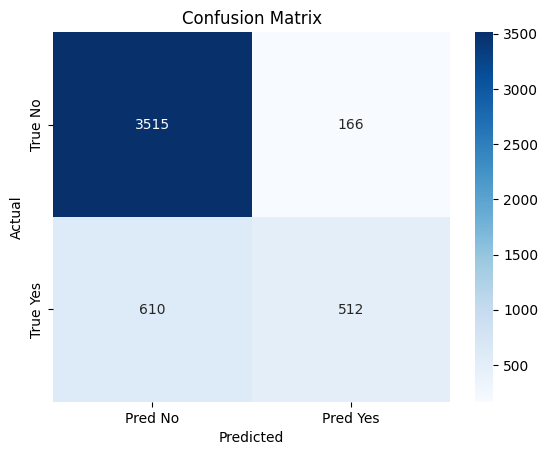

In [103]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y1_test, y_pred_reglogistica)

# Mostrar la matriz de confusión como un heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir el informe de clasificación
#print(classification_report(y1_test, y_pred_reglogistica))

### Interpretación de la matriz de confusión.
En esta matriz de confusión podemos observar cómo el modelo es muy bueno prediciendo que no lloverá mañana, habiendo acertado 3515 veces y fallado (llovio al dia siguiente) 166 veces. Sin embargo, cuando se trata de predecir las veces que sí lloverá mañana, vemos que sólo logró predecir 512 veces y falló otras 610 veces. Esto último quiere decir que está teniendo problemas para lograr predecir cuando SI lloverá al día siguiente.

Podemos obtener más información sobre nuestro modelo analizando sus métricas:

In [104]:
print(classification_report(y1_test, y_pred_reglogistica))

              precision    recall  f1-score   support

          No       0.85      0.95      0.90      3681
         Yes       0.76      0.46      0.57      1122

    accuracy                           0.84      4803
   macro avg       0.80      0.71      0.73      4803
weighted avg       0.83      0.84      0.82      4803



Como en este problema estamos tratando de predecir si mañana llueve o no, podemos pensar que es preferible decir que lloverá y que no llueva en lugar de decir que no lloverá y que llueva. Es decir, en este problema en particular los falsos negativos (decir que no lloverá y que sí llueva) son los más importantes, por lo tanto, la métrica a utilizar será recall.

El modelo de regresión logística entrenado tiene un accuracy del 84%, lo cual puede parecer bueno a primera vista pero, luego de analizarlo más detalladamente podremos encontrar que esta es una métrica engañosa en este caso. Veamos las restantes:
- precision: cuando el modelo clasifica con la clase de que NO lloverá tiene una precisión o acierto del 85%, mientras que cuando clasifica con la clase de que SI lloverá tiene una precisión o acierto del 76%. Estos son buenos valores por sí solos.
- recall: el modelo clasifica correctamente el 95% de los NO lloverá, <b>sin embargo solo un 46% de los casos en que clasificó que SI llovería fueron correctos,</b> dejando un error del 54%.

En conclusión, el modelo es bueno prediciendo que NO lloverá, pero de las que etiquetó como que SI llovería solo acertó en menos de la mitad (y de estos aciertos tres cuartos eran correctos). Esto se debe principalmente al desbalanceo que hay en nuestras clases.

### ¿Qué podemos hacer para lograr que nuestro modelo realice mejores predicciones?
Para corregir el desbalanceo de las clases podemos realizar tanto un undersampling, oversampling o darle más peso a la clase minoritaria.

En nuestro caso, como nuestros datos son escasos consideramos que sería mejor agregar datos con un oversampling antes que quitarlos con un oversampling. Sin embargo y a modo de prueba, probemos también los métodos de darle peso a la clase minoritaria con los hiperparámetros que nos facilita sci-kit learn.

#### Más peso a la clase minoritaria

In [105]:
regresionLogisticaBalanceada = LogisticRegression(class_weight="balanced", max_iter=300, solver='liblinear')

In [106]:
regresionLogisticaBalanceada.fit(X_train, y1_train)

LogisticRegression(class_weight='balanced', max_iter=300, solver='liblinear')

In [107]:
y_pred_reglogisticaBalanceada = regresionLogisticaBalanceada.predict(X_test)

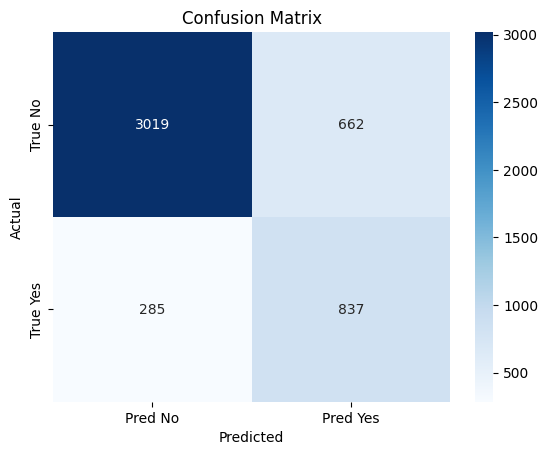

In [108]:
conf_matrix = confusion_matrix(y1_test, y_pred_reglogisticaBalanceada)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [109]:
print(classification_report(y1_test, y_pred_reglogisticaBalanceada))

              precision    recall  f1-score   support

          No       0.91      0.82      0.86      3681
         Yes       0.56      0.75      0.64      1122

    accuracy                           0.80      4803
   macro avg       0.74      0.78      0.75      4803
weighted avg       0.83      0.80      0.81      4803



Con el hiperparámetro de balancear el dataset que nos brinda scikitlearn logramos una buena mejora de la efectividad de nuestro modelo de clasificación:

Ahora tenemos que del total de veces que no llovería al día siguiente, se logró acertar el 82%, mientras que del total de veces que si llovió al día siguiente se logró un acierto del 75%.

In [110]:
regresionLogisticaBalanceada2 = LogisticRegression(class_weight={"Yes":4}, max_iter=300, solver='liblinear')

In [111]:
regresionLogisticaBalanceada2.fit(X_train, y1_train)
y_pred_reglogisticaBalanceada2 = regresionLogisticaBalanceada2.predict(X_test)

In [112]:
print(classification_report(y1_test, y_pred_reglogisticaBalanceada2))

              precision    recall  f1-score   support

          No       0.92      0.78      0.85      3681
         Yes       0.52      0.79      0.63      1122

    accuracy                           0.78      4803
   macro avg       0.72      0.78      0.74      4803
weighted avg       0.83      0.78      0.79      4803



Logramos un resultado similar si le añadimos un peso de 4 a la clase SI.

#### Oversampling

Para realizar un oversampling de nuestro dataset y lograr un resultado lo más fiel a la realidad posible, decidimos probar con el método SMOTE.

In [113]:
!pip install imblearn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y1_train)
print('Before', counter)

#Oversampling del dataset de entrenamiento con SMOTE
smt = SMOTE()

#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y1_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({'No': 14866, 'Yes': 4575})


c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


After Counter({'Yes': 14866, 'No': 14866})


In [115]:
y_train_sm.unique()

array(['Yes', 'No'], dtype=object)

In [116]:
regresionLogistica = LogisticRegression(solver='liblinear')

In [117]:
regresionLogistica.fit(X_train_sm, y_train_sm)

LogisticRegression(solver='liblinear')

In [118]:
y_pred_reglogisticaSMOTE = regresionLogistica.predict(X_test)

In [119]:
print(classification_report(y1_test, y_pred_reglogisticaSMOTE))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89      3681
         Yes       0.65      0.59      0.62      1122

    accuracy                           0.83      4803
   macro avg       0.76      0.74      0.75      4803
weighted avg       0.82      0.83      0.83      4803



A pesar de haber utilizado SMOTE nuestro recall mejora de manera muy leve, pero no llega a compararse con el método de balanceo implementado con scikitlearn.

Utilizaremos el modelo que mejores métricas arrojó.

### Curva ROC

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [121]:
y_probs = regresionLogisticaBalanceada.predict_proba(X_test)[:,1]

In [122]:
fpr, tpr, thresholds = roc_curve(y1_test, y_probs, pos_label="Yes")

In [123]:
roc_auc = auc(fpr, tpr)

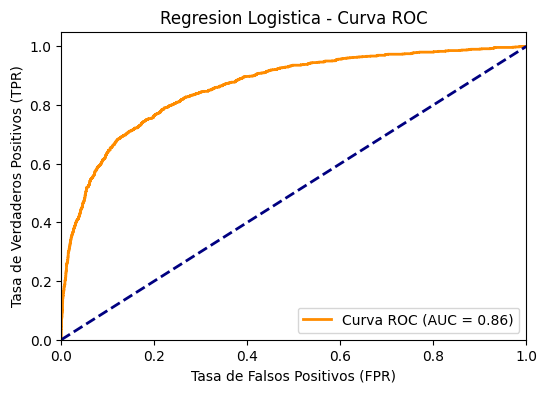

In [124]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Regresion Logistica - Curva ROC')
plt.legend(loc="lower right")
plt.show()

Podemos ovservar que el mejor threshold probablemente se encuentre en un punto donde los verdaderos positivos sean los maximos posibles y los falsos positivos los minimos posibles. Probablemente estamos hablando de un punto que conserve una tasa de verdaderos positivos de entre un 70 y un 80%.

Para comprobarlo, podemos maximizar la diferencia entre los verdaderos positivos y los falsos positivos.

In [165]:
diferencia = tpr-fpr

In [170]:
indiceThreshold = np.argmax(diferencia) #obtener el índice de el valor máximo de la diferencia

In [171]:
thresholdOptimo = thresholds[indiceThreshold]

In [173]:
print(f"""
    Threshold óptimo = {round(thresholdOptimo,2)}
    Tasa de Verdaderos Positivos = {round(tpr[indiceThreshold],2)}
    Tasa de Falsos Positivos = {round(fpr[indiceThreshold],2)}
      """)


    Threshold óptimo = 0.45
    Tasa de Verdaderos Positivos = 0.79
    Tasa de Falsos Positivos = 0.22
      


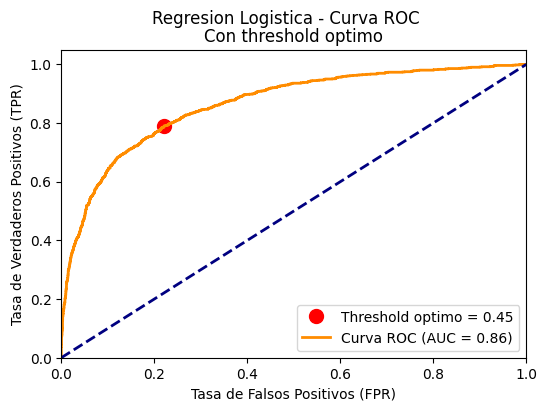

In [178]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot( fpr[indiceThreshold],tpr[indiceThreshold], 'ro',markersize=10, label=f'Threshold optimo = {round(thresholdOptimo,2)}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.suptitle('Regresion Logistica - Curva ROC')
plt.title('Con threshold optimo')
plt.legend(loc="lower right")
plt.show()

# Modelo Base para clasificacion y para regresion

Implementar un modelo base para clasificación y uno para regresión. 


## Estandarizo los datos

In [125]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento
scaler.fit(X_train)

# Transformar los datos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo base para regresión

-- Importamos las librerias necesarias para realiazr el modelo base y sus metricas

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


-- Creamos el modelo de regresion

In [127]:
# Crear el modelo de regresión lineal
linear_reg = LinearRegression()

-- Entrenamos el modelo de regresion con xtrain ytrain

In [128]:
# Entrenar el modelo con el conjunto de entrenamiento
linear_reg.fit(X_train_scaled, y2_train)


LinearRegression()

-- Realizamos las predicciones

In [129]:
# Hacer predicciones para el conjunto de entrenamiento y prueba
y2_train_pred = linear_reg.predict(X_train_scaled)
y2_test_pred = linear_reg.predict(X_test_scaled)


-- Calculamos las métricas para el conjunto de entrenamiento

In [130]:
mse_train = mean_squared_error(y2_train, y2_train_pred)
mae_train = mean_absolute_error(y2_train, y2_train_pred)
r2_train = r2_score(y2_train, y2_train_pred)

-- Metricas para el conjunto de test

In [131]:
mse_test = mean_squared_error(y2_test, y2_test_pred)
mae_test = mean_absolute_error(y2_test, y2_test_pred)
r2_test = r2_score(y2_test, y2_test_pred)


-- Estadisticas

In [132]:
print(f'Modelo de Regresión Lineal:\nMSE (train): {mse_train}, MAE (train): {mae_train}, R2 (train): {r2_train}')
print(f'MSE (test): {mse_test}, MAE (test): {mae_test}, R2 (test): {r2_test}')

Modelo de Regresión Lineal:
MSE (train): 26.255958811030105, MAE (train): 2.476047224010841, R2 (train): 0.23394269566797776
MSE (test): 29.236463330444792, MAE (test): 2.5296621671174404, R2 (test): 0.24616615001723274


## Modelo base para clasificacion

-- Librerias

In [133]:
from sklearn.dummy import DummyClassifier

-- Modelo base de clas

In [134]:
# Crear el modelo base para clasificación
dummy_clf = DummyClassifier(strategy="most_frequent")


-- Entrenamos el modelo

In [135]:
# Entrenar el modelo con el conjunto de entrenamiento
dummy_clf.fit(X_train_scaled, y1_train)


DummyClassifier(strategy='most_frequent')

-- Predicciones

In [136]:
# Hacer predicciones para el conjunto de entrenamiento y prueba
y1_train_pred = dummy_clf.predict(X_train_scaled)
y1_test_pred = dummy_clf.predict(X_test_scaled)

-- Calcular e imprimir metricas para entrenamiento y prueba

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [138]:
# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y1_train, y1_train_pred)
precision_train = precision_score(y1_train, y1_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y1_train, y1_train_pred, average='weighted', zero_division=1)
f1_train = f1_score(y1_train, y1_train_pred, average='weighted', zero_division=1)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y1_test, y1_test_pred)
precision_test = precision_score(y1_test, y1_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(y1_test, y1_test_pred, average='weighted', zero_division=1)
f1_test = f1_score(y1_test, y1_test_pred, average='weighted', zero_division=1)

In [139]:


print(f'Modelo Base - Clasificación:\nAccuracy (train): {accuracy_train}, Precision (train): {precision_train}, Recall (train): {recall_train}, F1 (train): {f1_train}')
print(f'Accuracy (test): {accuracy_test}, Precision (test): {precision_test}, Recall (test): {recall_test}, F1 (test): {f1_test}')

Modelo Base - Clasificación:
Accuracy (train): 0.7646725991461345, Precision (train): 0.8200515847387704, Recall (train): 0.7646725991461345, F1 (train): 0.6626999072437948
Accuracy (test): 0.7663960024984384, Precision (test): 0.820966830147148, Recall (test): 0.7663960024984384, F1 (test): 0.6650409441765093


# Hiperparametros

## Dividir dataset en entrenamiento, validación y prueba

In [140]:
(X_test.shape[0]+X_train.shape[0])

24244

Como nuestro X_train ya se encuentra ordenado por fecha y teniendo en cuenta que el conjunto de entrenamiento representa el 80% del dataset total, lo dividiremos una vez más para extraer un 10% del dataset original.

$ 24244 \rightarrow 100%\\$


$x \rightarrow 10%\\$


$\frac{24244*10}{100}= 2424$

Entonces, seran los ultimos 2424 registros del X_train los que seran nuestro conjunto de validación.

In [141]:
indiceDeCorte = X_train.shape[0] - 2424

In [142]:
X_val = X_train.iloc[indiceDeCorte:,:]
X_train_70porciento = X_train.iloc[:indiceDeCorte,:]

y1_val = y1_train[indiceDeCorte:]
y1_train_70porciento = y1_train[:indiceDeCorte]

y2_val = y2_train[indiceDeCorte:]
y2_train_70porciento = y2_train[:indiceDeCorte]

De esta forma tenemos un conjunto de entrenamiento que representa un 70% del dataset, un conjunto de validacion que representa un 10 % y un conjunto de testeo o prueba que representa un 20%.

## Validación Cruzada

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [144]:
y1_train_binary = y1_train.copy()

In [145]:
y1_train_binary[y1_train_binary == "Yes"] = 1
y1_train_binary[y1_train_binary == "No"] = 0

In [146]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

threshold = 0.5 
y1_train_binary = np.where(y1_train_binary > threshold, 1, 0)

y1_train_binary = y1_train_binary.astype(int)


clf = LogisticRegression(class_weight="balanced", max_iter=300, solver='liblinear')
scores = cross_val_score(clf, X_train, y1_train_binary, cv=5, scoring='recall')
print("Cross-validation scores:", scores)


Cross-validation scores: [0.78251366 0.81311475 0.80655738 0.73661202 0.73114754]


In [147]:
print("%0.2f de recall con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.77 de recall con una desviacion estandar de 0.03


## Grid Search


Regresión Lineal Regularizada con Grid Search
Hiperparámetros a optimizar:

* Ridge: alpha controla la regularización L2.
* Logistic Regression: C controla la regularización inversa, penalty define el tipo de penalización, y solver el algoritmo de optimización.

In [148]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import GridSearchCV

-- Definimos el espacio de busqueda de hiperparametros.

In [149]:
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
logreg_params = {'C': [0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

-- Traemos nuestra regresion logistica realizada anteriormente

In [150]:
regresionLogistica

LogisticRegression(solver='liblinear')

-- Creamos el gridseach para ridge

In [151]:
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y2_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

-- Creamos el gridsearch para logstic

In [152]:
logreg_grid_search = GridSearchCV(regresionLogistica, logreg_params, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train_scaled, y1_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

-- Mejor modelo y sus hiperparametros

In [153]:
# Mejor modelo y sus hiperparámetros
best_ridge = ridge_grid_search.best_estimator_
best_logreg = logreg_grid_search.best_estimator_

print(f'Mejor modelo Ridge: {best_ridge}')
print(f'Mejores hiperparámetros Ridge: {ridge_grid_search.best_params_}')
print(f'Mejor modelo Logistic Regression: {best_logreg}')
print(f'Mejores hiperparámetros Logistic Regression: {logreg_grid_search.best_params_}')

Mejor modelo Ridge: Ridge(alpha=10.0)
Mejores hiperparámetros Ridge: {'alpha': 10.0}
Mejor modelo Logistic Regression: LogisticRegression(solver='liblinear')
Mejores hiperparámetros Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


-- Justificacion

Es exhaustivo y garantiza encontrar la mejor combinación de hiperparámetros en un espacio pequeño, ideal para nuestra regresión logistica..

## Random Search

ElasticNet con Random Search
Hiperparámetros a optimizar:

ElasticNet: alpha controla la regularización y l1_ratio controla la mezcla de L1 y L2.

-- Librerias

In [154]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

-- Definimos el espacio de búsqueda

In [155]:
# Definir el espacio de búsqueda de hiperparámetros
elasticnet_params = {'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}

-- Buscamos nuestro elasticnet

In [156]:
elasticnet_regressor

ElasticNet()

-- Creamos el randomsearch

In [157]:
# Crear RandomizedSearchCV para ElasticNet
elasticnet_random_search = RandomizedSearchCV(elasticnet_regressor, elasticnet_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
elasticnet_random_search.fit(X_train_scaled, y2_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

-- Cual es el mejor modelo y sus hiperparametros

In [158]:
# Mejor modelo y sus hiperparámetros
best_elasticnet = elasticnet_random_search.best_estimator_

print(f'Mejor modelo ElasticNet: {best_elasticnet}')
print(f'Mejores hiperparámetros ElasticNet: {elasticnet_random_search.best_params_}')

Mejor modelo ElasticNet: ElasticNet(alpha=0.1, l1_ratio=0.1)
Mejores hiperparámetros ElasticNet: {'l1_ratio': 0.1, 'alpha': 0.1}


-- Justificacion

Random search es más eficiente en tiempo para espacios grandes de hiperparámetros, permite explorar una mayor variedad de combinaciones.

## Optuna

Logistic Regression con Optuna
Hiperparámetros a optimizar:

Logistic Regression: C para regularización y penalty para tipo de penalización.

- Liberias

In [159]:
#!pip install optuna

In [160]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-- funcion objetivo para conocer 

In [161]:
# función para entrenar y evaluar un modelo con hiperparámetros dados
def train_evaluate_model(params, X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [162]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    params = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
    }

    mse = train_evaluate_model(params, X_train, y1_train, X_test, y1_test)
    return mse

-- Optuna

In [163]:
y2_train

45573     3.6
45574     3.6
45575    39.8
45576     2.8
45577     0.0
         ... 
32878     0.0
83348     0.0
8423      0.0
83349     0.0
98850     0.0
Name: RainfallTomorrow, Length: 19441, dtype: float64

In [164]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
best_optuna_params = study.best_params
best_optuna_model = RandomForestRegressor(**best_optuna_params, random_state=42)
best_optuna_model.fit(X_train, y1_train)
optuna_mse = mean_squared_error(y1_test, best_optuna_model.predict(X_test))

[I 2024-05-23 18:36:22,411] A new study created in memory with name: no-name-869379cb-a516-4945-b511-1c5b2dfbd8f4
[W 2024-05-23 18:36:22,437] Trial 0 failed with parameters: {'n_estimators': 188, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1} because of the following error: ValueError("could not convert string to float: 'Yes'").
Traceback (most recent call last):
  File "c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Lucas\AppData\Local\Temp\ipykernel_24340\3588603637.py", line 14, in objective
    mse = train_evaluate_model(params, X_train, y1_train, X_test, y1_test)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lucas\AppData\Local\Temp\ipykernel_24340\1290354784.py", line 4, in train_evaluate_model
    model.fit(X_train, y_train)
  File "c:\Users\Lucas\AppData\Lo

ValueError: could not convert string to float: 'Yes'

-- Justificacion

Utiliza técnicas avanzadas para optimización eficiente, ideal para modelos con muchos hiperparámetros y cuando se busca una combinación óptima de manera rápida.


# Explicabilidad del modelo

## Shap

In [179]:
!pip --quiet install shap



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importar Librerías

In [180]:
import shap
import matplotlib.pyplot as plt

### Explicar el Modelo de Regresión

In [181]:
linear_reg # Modelo base de regresion

LinearRegression()

- Objeto shap 

In [204]:
df_X_train_scaled=pd.DataFrame(X_train_scaled)
df_X_test_scaled = pd.DataFrame(X_test_scaled)

In [205]:
df_X_train_scaled.columns=X_train.columns
df_X_test_scaled.columns = X_test.columns

In [206]:
# Crear un objeto explainer de SHAP para regresión
explainer_regression = shap.Explainer(linear_reg, df_X_train_scaled)
shap_values_regression = explainer_regression(df_X_test_scaled)


-- Gráficos

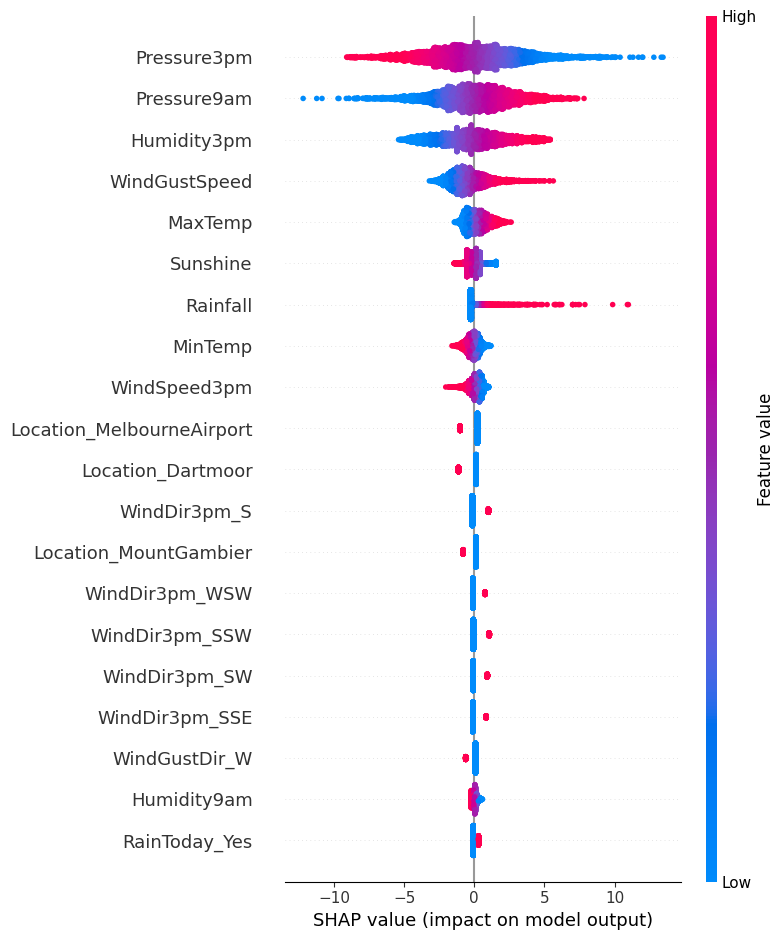

In [215]:
# Gráficas a nivel global para el modelo de regresión
shap.summary_plot(shap_values_regression, X_test_scaled, feature_names=X_test.columns)


De este gráfrico global de SHAP podemos ver que valores altos de la variable presión a las 3pm tienden a bajar el valor SHAP del modelo, mientras que los valores bajo lo aumentan.
Con la presión a las 9am tenemos lo contrario: valores bajo restan valor SHAP, y valores altos de la presión aumentan el valor SHAP.
Lo mismo sucede con las siguientes 3 variables.

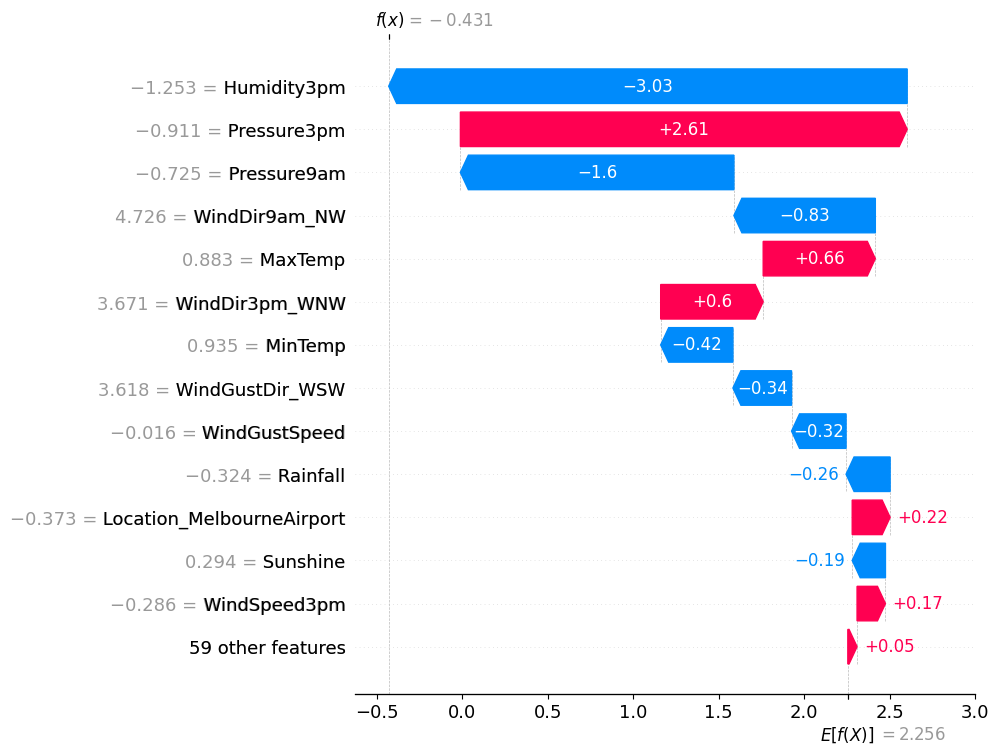

In [211]:
shap.plots.waterfall(shap_values_regression[400], max_display=14)

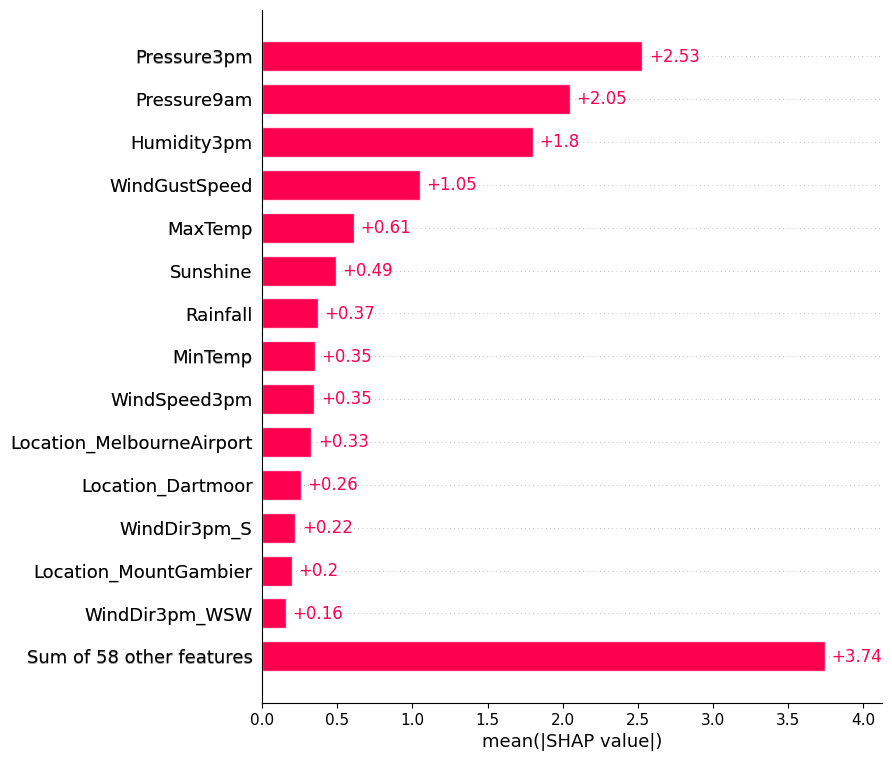

In [212]:
shap.plots.bar(shap_values_regression, max_display=15)

### Explicar el Modelo Base de Clasificación

-- Traemos el modelo dummyclassifier

In [ ]:
dummy_clf

DummyClassifier(strategy='most_frequent')

-- Creamos el objeto shap

In [216]:
# Crear un objeto explainer de SHAP para DummyClassifier
explainer_dummy = shap.Explainer(LogisticRegression, df_X_train_scaled)
shap_values_dummy = explainer_dummy(df_X_test_scaled)

TypeError: len() of unsized object